In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

In [2]:
def reduce_mem_usage(df):
    """
    iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    @param df:
    @return:
    """
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
            df[col] = df[col].astype('str')

    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
path = '../input/'
train = reduce_mem_usage(pd.read_csv(path + 'train.csv'))
test = reduce_mem_usage(pd.read_csv(path + 'test.csv'))

Memory usage of dataframe is 2651816.00 MB
Memory usage after optimization is: 586559.00 MB
Decreased by 77.9%
Memory usage of dataframe is 39104.00 MB
Memory usage after optimization is: 8654.00 MB
Decreased by 77.9%


In [4]:
train.columns = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp', 'outdoorHum', 'outdoorAtmo',
                 'indoorHum', 'indoorAtmo', 'temperature']
test.columns = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp', 'outdoorHum', 'outdoorAtmo',
                'indoorHum', 'indoorAtmo']

In [5]:
train.shape, test.shape

((25497, 13), (406, 12))

In [6]:
train = train[train['temperature'].notnull()]

In [7]:
train.head().append(train.tail())

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo,temperature
0,1552496443,2019,3,14,1,0,43,14.601562,85.0,993.0,80.0,992.5,15.398438
1,1552496503,2019,3,14,1,1,43,14.703125,84.0,993.0,80.0,992.5,15.398438
2,1552496565,2019,3,14,1,2,45,14.703125,84.0,992.5,80.0,993.0,15.398438
3,1552496624,2019,3,14,1,3,44,14.601562,85.0,993.0,80.0,992.5,15.398438
4,1552496682,2019,3,14,1,4,42,14.601562,85.0,992.5,80.0,992.5,15.296875
25492,1554224151,2019,4,3,0,55,51,17.296875,78.0,984.0,75.0,982.0,17.406250
25493,1554224212,2019,4,3,0,56,52,17.296875,77.0,983.5,75.0,982.5,17.406250
25494,1554224272,2019,4,3,0,57,52,17.296875,77.0,983.0,75.0,982.0,17.406250
25495,1554224332,2019,4,3,0,58,52,17.296875,77.0,983.5,75.0,982.5,17.406250
25496,1554224391,2019,4,3,0,59,51,17.203125,77.0,983.0,75.0,982.5,17.406250


In [8]:
test.head().append(test.tail())

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo
0,1554224413,2019,4,3,1,0,13,15.296875,91.0,988.0,88.0,988.5
1,1554226217,2019,4,3,1,30,17,15.398438,91.0,988.0,88.0,988.0
2,1554228020,2019,4,3,2,0,20,15.296875,92.0,988.0,89.0,988.5
3,1554229823,2019,4,3,2,30,23,15.203125,92.0,988.0,89.0,988.5
4,1554231625,2019,4,3,3,0,25,15.500000,91.0,988.0,88.0,988.0
401,1555081072,2019,4,12,22,57,52,21.906250,66.0,981.0,66.0,978.5
402,1555082935,2019,4,12,23,28,55,21.593750,66.0,981.5,65.0,979.5
403,1555084737,2019,4,12,23,58,57,22.093750,65.0,980.0,65.0,980.5
404,1555086487,2019,4,13,0,28,7,26.703125,44.0,976.0,48.0,977.0
405,1555088229,2019,4,13,0,57,9,27.093750,43.0,975.5,47.0,977.0


In [9]:
train.shape, test.shape

((24807, 13), (406, 12))

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
time,24807.0,1.553341e+09,5.029136e+05,1.552496e+09,1.552913e+09,1.553333e+09,1.553775e+09,1.554224e+09
year,24807.0,2.019000e+03,0.000000e+00,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,24807.0,3.097069e+00,2.960582e-01,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
day,24807.0,2.028431e+01,7.939102e+00,1.000000e+00,1.600000e+01,2.200000e+01,2.600000e+01,3.100000e+01
hour,24807.0,1.209566e+01,6.894425e+00,0.000000e+00,6.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01
min,24807.0,2.955561e+01,1.729006e+01,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01
sec,24807.0,2.967437e+01,1.721648e+01,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01
outdoorTemp,24389.0,inf,4.253906e+00,8.898438e+00,1.339844e+01,1.600000e+01,1.870312e+01,3.259375e+01
outdoorHum,24389.0,inf,1.639062e+01,2.300000e+01,6.300000e+01,7.800000e+01,8.800000e+01,9.600000e+01
outdoorAtmo,24389.0,inf,inf,4.002500e+02,9.800000e+02,9.860000e+02,9.905000e+02,1.082000e+03


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
time,406.0,1.554651e+09,2.583482e+05,1.554224e+09,1.554414e+09,1.554649e+09,1.554891e+09,1.555088e+09
year,406.0,2.019000e+03,0.000000e+00,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,406.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
day,406.0,7.463054e+00,2.972693e+00,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01,1.300000e+01
hour,406.0,1.206650e+01,7.002857e+00,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
min,406.0,2.671429e+01,1.780254e+01,0.000000e+00,1.000000e+01,3.000000e+01,4.075000e+01,5.900000e+01
sec,406.0,2.896305e+01,1.712571e+01,0.000000e+00,1.400000e+01,2.800000e+01,4.400000e+01,5.900000e+01
outdoorTemp,404.0,2.135938e+01,5.558594e+00,1.310156e+01,1.659375e+01,2.059375e+01,2.509375e+01,3.668750e+01
outdoorHum,404.0,6.643750e+01,1.873438e+01,2.500000e+01,5.200000e+01,6.600000e+01,8.300000e+01,9.500000e+01
outdoorAtmo,404.0,inf,1.295312e+01,9.010000e+02,9.745000e+02,9.785000e+02,9.870000e+02,1.063000e+03


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24807 entries, 0 to 25496
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         24807 non-null  int32  
 1   year         24807 non-null  int16  
 2   month        24807 non-null  int8   
 3   day          24807 non-null  int8   
 4   hour         24807 non-null  int8   
 5   min          24807 non-null  int8   
 6   sec          24807 non-null  int8   
 7   outdoorTemp  24389 non-null  float16
 8   outdoorHum   24389 non-null  float16
 9   outdoorAtmo  24389 non-null  float16
 10  indoorHum    24807 non-null  float16
 11  indoorAtmo   24807 non-null  float16
 12  temperature  24807 non-null  float16
dtypes: float16(6), int16(1), int32(1), int8(5)
memory usage: 751.0 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         406 non-null    int32  
 1   year         406 non-null    int16  
 2   month        406 non-null    int8   
 3   day          406 non-null    int8   
 4   hour         406 non-null    int8   
 5   min          406 non-null    int8   
 6   sec          406 non-null    int8   
 7   outdoorTemp  404 non-null    float16
 8   outdoorHum   404 non-null    float16
 9   outdoorAtmo  404 non-null    float16
 10  indoorHum    405 non-null    float16
 11  indoorAtmo   405 non-null    float16
dtypes: float16(5), int16(1), int32(1), int8(5)
memory usage: 8.5 KB


In [14]:
train.isnull().sum().sort_values(ascending=False)

outdoorAtmo    418
outdoorHum     418
outdoorTemp    418
temperature      0
indoorAtmo       0
indoorHum        0
sec              0
min              0
hour             0
day              0
month            0
year             0
time             0
dtype: int64

In [15]:
test.isnull().sum().sort_values(ascending=False)

outdoorAtmo    2
outdoorHum     2
outdoorTemp    2
indoorAtmo     1
indoorHum      1
sec            0
min            0
hour           0
day            0
month          0
year           0
time           0
dtype: int64

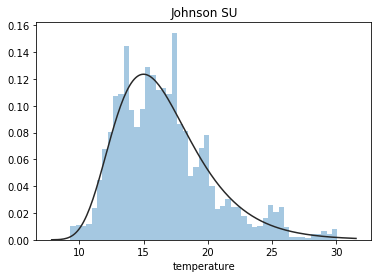

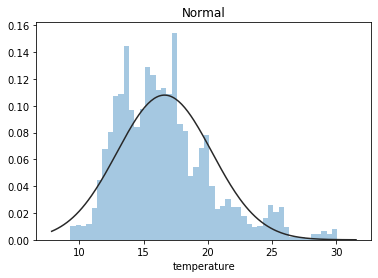

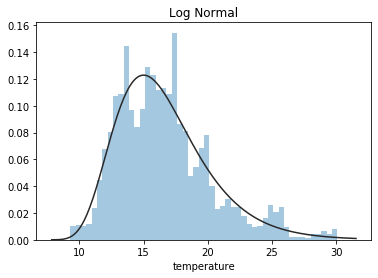

In [16]:
y = train['temperature']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

Skewness: 0.916504
Kurtosis: 0.921875


(time            0.042563
 year            0.000000
 month           2.722189
 day            -0.971769
 hour           -0.145425
 min            -0.004005
 sec            -0.009804
 outdoorTemp     0.980120
 outdoorHum     -0.790642
 outdoorAtmo   -17.649543
 indoorHum      -0.917261
 indoorAtmo    -12.681333
 temperature     0.926150
 dtype: float64,
 time            -1.200271
 year             0.000000
 month            5.410747
 day              0.590072
 hour            -1.165767
 min             -1.197135
 sec             -1.180270
 outdoorTemp      1.025726
 outdoorHum      -0.196982
 outdoorAtmo    441.611436
 indoorHum        0.123061
 indoorAtmo     163.188938
 temperature      0.934083
 dtype: float64)

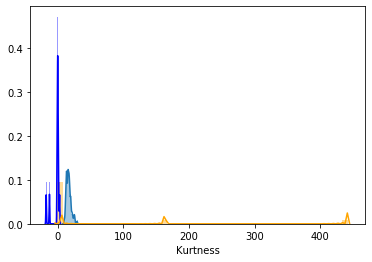

In [17]:
sns.distplot(train['temperature']);
print("Skewness: %f" % train['temperature'].skew())
print("Kurtosis: %f" % train['temperature'].kurt())
sns.distplot(train.skew(), color='blue', axlabel ='Skewness')
sns.distplot(train.kurt(), color='orange', axlabel ='Kurtness')
train.skew(), train.kurt()

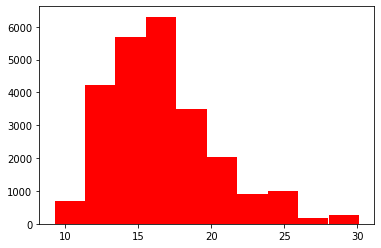

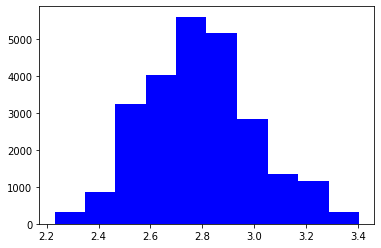

In [18]:
plt.hist(train['temperature'], orientation='vertical',histtype='bar', color='red')
plt.show()
plt.hist(np.log(train['temperature']), orientation='vertical',histtype='bar', color='blue')
plt.show()

In [19]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.columns

Index(['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp',
       'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'temperature'],
      dtype='object')

In [20]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index([], dtype='object')

In [21]:
numerical_features = ['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo']
categorical_features = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec']

In [22]:
numerical_features.append('temperature')
print(numerical_features)

['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'temperature']


temperature    1.000000
outdoorTemp    0.992841
indoorAtmo    -0.114140
outdoorAtmo   -0.228206
outdoorHum    -0.917701
indoorHum     -0.923177
Name: temperature, dtype: float64 



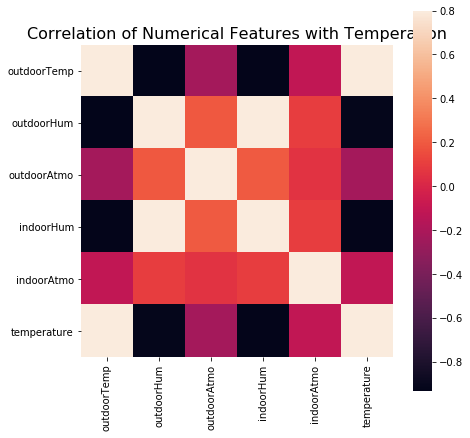

In [23]:
temperature_numerical = train[numerical_features]
correlation = temperature_numerical.corr()
print(correlation['temperature'].sort_values(ascending=False), '\n')
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation of Numerical Features with Temperation', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)
del temperature_numerical['temperature']

In [24]:
for col in numerical_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ',
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

outdoorTemp     Skewness: 00.98     Kurtosis: 000inf
outdoorHum      Skewness: -0inf     Kurtosis: 000inf
outdoorAtmo     Skewness: 00nan     Kurtosis: 000nan
indoorHum       Skewness: -0inf     Kurtosis: 000inf
indoorAtmo      Skewness: 00nan     Kurtosis: 000nan
temperature     Skewness: 00.92     Kurtosis: 000.92


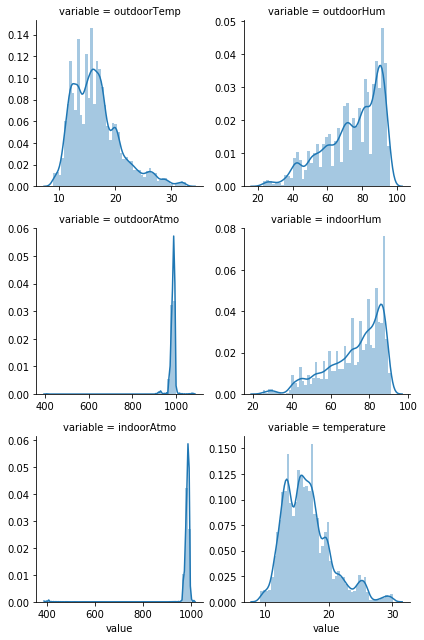

In [25]:
f = pd.melt(train, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [26]:
numerical_features

['outdoorTemp',
 'outdoorHum',
 'outdoorAtmo',
 'indoorHum',
 'indoorAtmo',
 'temperature']

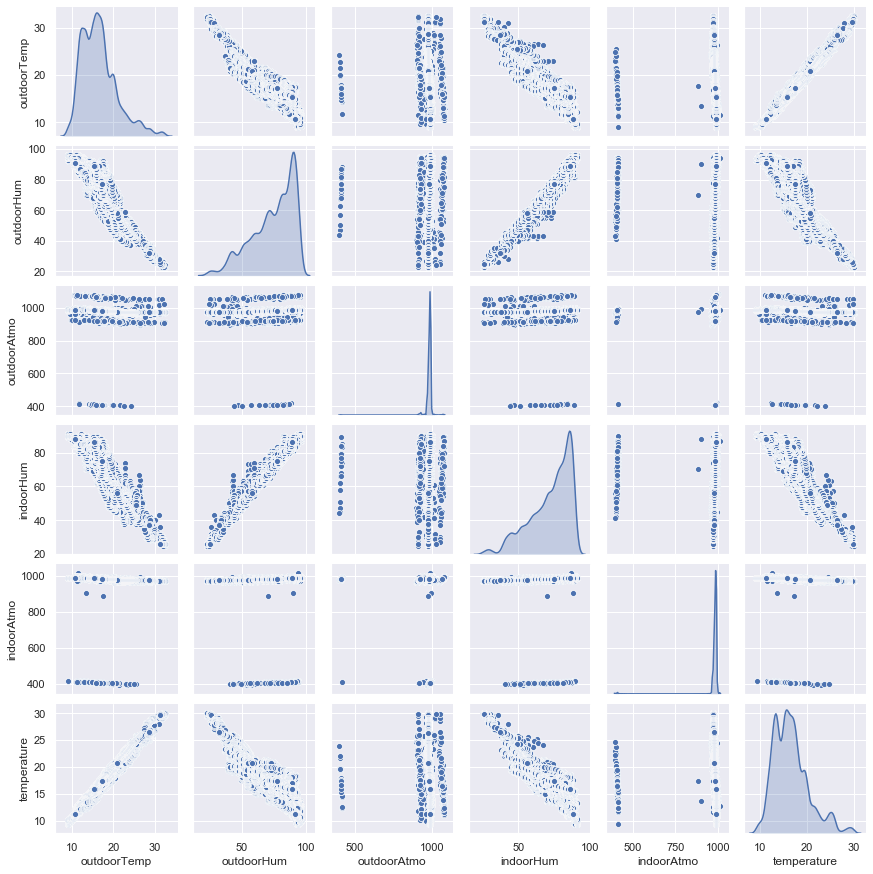

In [27]:
sns.set()
columns = numerical_features
sns.pairplot(train[columns], height=2 ,kind='scatter', diag_kind='kde')
plt.show()